In [ ]:
# Import necessary libraries
import oracledb
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Connect to Oracle database, select freq_A, freq_T, freq_GC
con = oracledb.connect(user="system", password="welcome", dsn="192.168.64.2:1521/XEPDB1")
cur = con.cursor()

# Select freq_A, freq_T, freq_GC
cur.execute("""select freq_A, freq_T, freq_GC from beeGenes""")

# Fetch all rows
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
con.close()

# Convert to NumPy array (float) for analysis
data = np.array(rows, dtype=float)

# View the first few rows of data
data[:5]

# Display the shape
data.shape

(484, 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


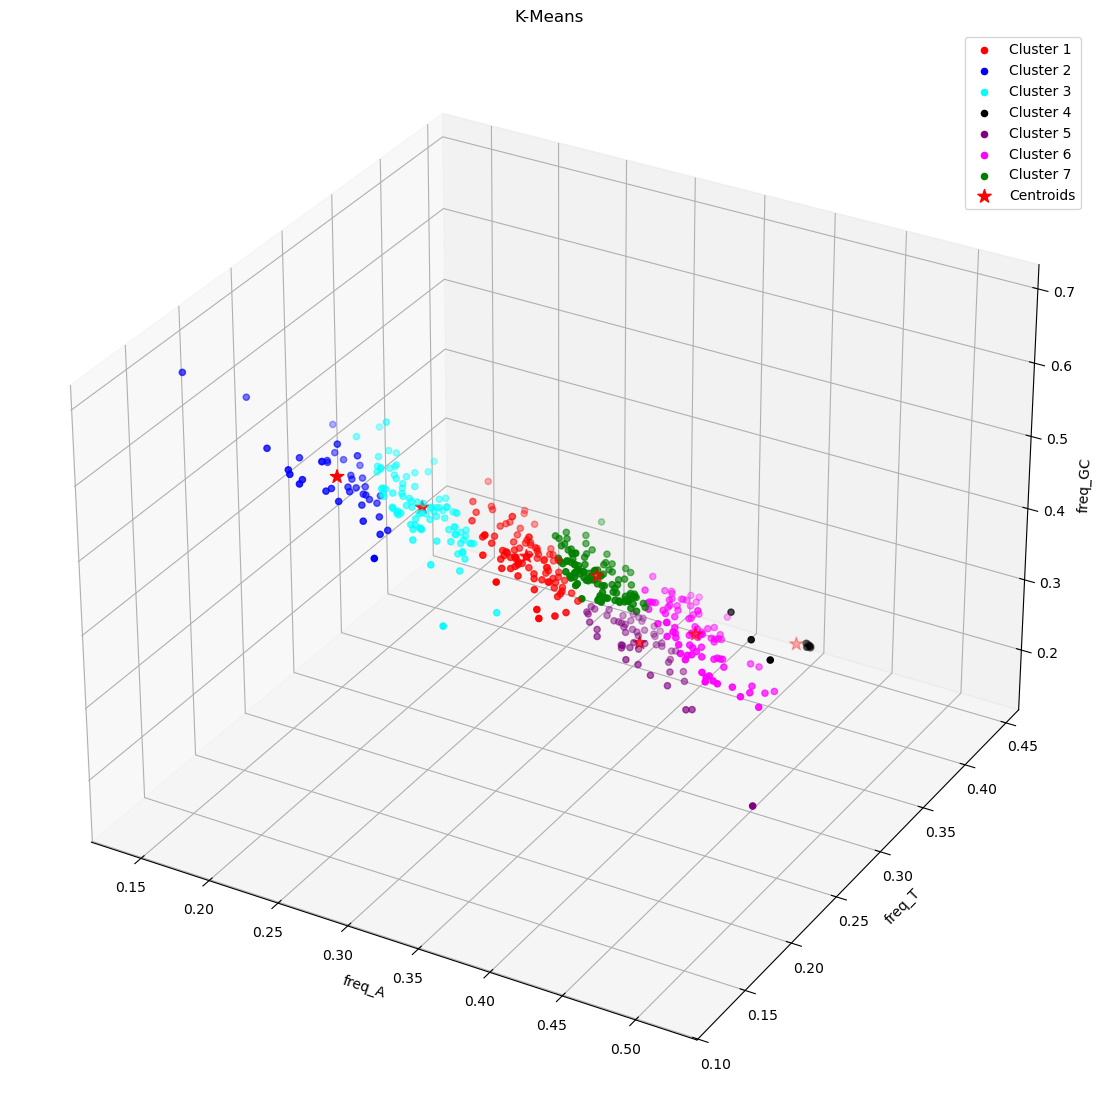

In [20]:
# Extracting data, since we use all data, we don't need to extract
X = data

# K-Means Cluster Analysis
km = KMeans(n_clusters=7,
            init = 'random',
            n_init = 10,
            max_iter = 500,
            tol = 1e-04,
            random_state = 0)

# Predict the cluster using dataset X
y_km = km.fit_predict(X)

# Specify figure size
fig = plt.figure(figsize=(14,14))

# Set the figure to 3d
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
label = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7"]
color = ["red","blue","aqua","black","purple","magenta","green"]

for i in range(len(label)):
    ax.scatter(X[y_km==i,0],
                X[y_km==i,1],
                X[y_km==i,2],
                s=20,
                c=color[i],
                marker='o',
                label=label[i])

# Mark the centroid
ax.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            km.cluster_centers_[:,2],
            s=100,
            c='red',
            marker='*',
            label='Centroids')
            
# Specify the legend to be upper right
ax.legend(loc=1)

# Set the title and labels of the plot
ax.set_title('K-Means')
ax.set_xlabel('freq_A')
ax.set_ylabel('freq_T')
ax.set_zlabel('freq_GC')
ax.grid()
plt.show()